## Binary Search on Answers


### Find square root of a number in log n
Consider the number n=25 the square root of 25 is 5

By linear search we can loop from 1 - n  
1x1=1 not equal to 25  
2x2=4 not equal to 25  
.  
.  
5x5=25 is equal to 25  
5 is the answer

In [3]:
# Using linear search
n = 25
ans = 1
for i in range(1, n+1):
    if i*i <= n:
        ans = i
    else:
        break
print(ans)
# Time complexity: O(n)
# Space complexity: O(1)

5


#### Using binary search  
Consider n = 28  
Our search space is from 1 to 28  
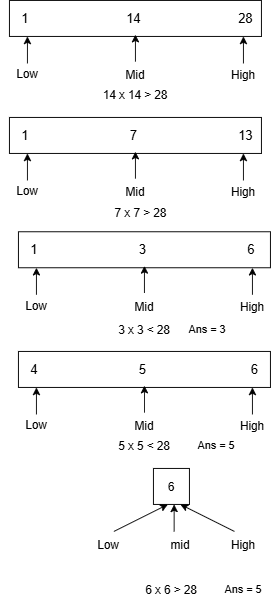

In [ ]:
# Using binary search
n = 35
ans = 1
low = 1
high = n
while low<=high:
    mid = int((low+high)/2)
    
    # Eliminate right
    if mid*mid > n:
        high = mid-1
    # Eliminate left
    elif mid*mid <= n:
        ans = mid
        low = mid+1

print(ans)
# Time complexity: O(log n)
# Space complexiy: O(1)

5


### Find nth root of a number
Consider n=3 and number m=27 and 3rd root of 27 is 3  
Consider n=4 and number m=69 and 4th root of 69 doesn't exist since 4th root of 16 is 2 and 4th root 81 is 3. So the answer is -1

In [ ]:
# Using linear search
def root(i,n):
    """For mutliplying"""
    a = 1
    for j in range(1,n+1):
        a = a*i
    return a

def searchroot(m,n):
    """Finding root"""
    for i in range(1,m+1):
        if root(i,n) == m:
            return i
        elif root(i,n) > m:
            break
    return -1

print(searchroot(16,4))
# Time complexity: O(m*n)
# Space complexity: O(1)

2


In [ ]:
# Using Binary search
def binaryroot(m,n):
    low = 1
    high = m
    
    while low<=high:
        mid = int((low+high)/2)
        if root(mid,n) == m:
            return mid
        # search in left
        if root(mid,n) > m:
            high = mid-1
        # search in right
        else:
            low = mid+1
    return -1

print(binaryroot(64,2))
# Time

8


### Koko eating bananas
Consider banana piles where each pile has certain number of bananas  
piles[] = [3,6,7,11]  
Koko is a person who has h=8 hours and in that koko has to eat all banana's in fastest possible manner  
Return the min integer k-(number of bananas eating per hour) such that koko can eat all banana's within h hours

Consider the piles[] = [3,6,7,11], let k=2 banana's per hour  
First pile - 3 banana's - takes 2 hours to eat (always take ceil)  
next pile - 6 banana's - takes 3 hours  
next pile - 7 banana's - takes 4 hours  
next pile - 11 banana's - takes 6 hours  
Total time is 15 hours  

Lets take 3 banana's per hour and repeat it again  
3 - 1 hour, 6 - 2 hours, 7 - 3 hours, 11 - 4 hours -> 10 hours  

Lets take 4 banana's per hour and repeat it again  
3 - 1 hour, 6 - 2 hours, 7 - 2 hours, 11 - 3 hours -> 8 hours

Start with 1 banana per hour and with each failure increase 1 banana and stop at a point of success  
Maximum will be max of piles array

In [ ]:
# Brute force: increase count per hour
import math
def requireTime(arr,p):
    """To calculate the total time"""
    time = 0
    for i in arr:
        time += math.ceil(i/p)
    return time

piles = [3,6,7,11]
h = 8
for i in range(1,max(piles)+1):
    t = requireTime(piles,i)
    if t <= h:
        print(i)
        break

# Time complexity: O(max(n) x n)
# Space complexity: O(1)


6
4


Now our range is 1 to max(arr), here our range is 1 -> 11, so we can apply binary search to get minimum.  

In [9]:
# Using binary search
def perhour(arr,h):
    low = 1
    high = max(arr)
    ans = max(arr)
    while low<=high:
        mid = int((low+high)/2)
        # Check on left
        if requireTime(arr,mid) <= h:
            ans = mid
            high = mid-1
        # Check on right
        else:
            low = mid+1
    return ans
piles = [30,11,23,4,20]
print(perhour(piles,5))

# Time complexity: O(n * log max(arr))
# Space complexity: O(1)
    

30


### Minimum days to make M bouquets
Consider the array, bloomDay = [7,7,7,7,13,11,12,7], This consists of blooming days of n flowers.  
Ex: index 0 flower will bloom on 7th day

What is the minimum number of days required such that you have amply amount of flowers to make m - bauquets  
m = 2  
We have to take k adjacent flowers to make one bouquet  
k = 3

Consider a scenario where all flowers are bloomed - 13th day  
3 flowers are required to make 1 bouquet  
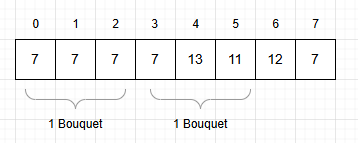  

But we have to find the minimum day where atleast 6 flowers are bloomed

Consider 7th day - only 5 flowers are bloomed  
Consider 12th day - 7 flowers are bloomed, but not minimum  
Consider 11th day - 6 flowers are bloomed, but flowers are not adjacent  

12 days are required to make 2 bouquets where each bouquet consists of 3 flowers

edge case: N < mxk -> return -1

Lets consider maximum number of days to make bouquets  
maximum - max(bloomDays) - here 13  
minimum in array - min(bloomDays) - here 7

The answer lies between 7 - 13

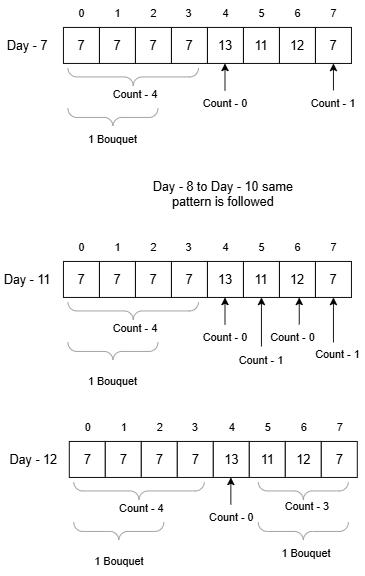

In [28]:
# Using brute force
bloomDays = [1,10,3,10,2]
m = 3
k = 1

# edge case
if len(bloomDays) < m*k:
    print(-1)

mini = min(bloomDays)
maxi = max(bloomDays)


def bouquet(arr, day, m, k):
    b = 0
    count = 0
    for i in range(len(arr)):
        if arr[i] <= day:
            count += 1
            if count%k == 0:
                b+=1
        else:
            count = 0
    return b

j = mini

while j <= maxi:
    b = 0
    b = bouquet(bloomDays, j,m,k)
    
    if b >= m:
        print(j)
        break
    j+=1
    


# Time complexity: O((max-min) * n)
# Space complexity: O(1)
    


3


On the range mini and maxi we can apply the binary search

In [35]:
# Using binary search
low = mini
high = maxi
ans = high

while low<=high:
    mid = int((low+high)/2)
    b = 0
    b = bouquet(bloomDays,mid,m,k)
    
    if b == m:
        ans = mid
        high = mid - 1 # because we want minimum
    # eliminate left
    else:
        low = mid+1
print(ans)
# Time complexity: O(n log (max-min))
# Space complexity: O(1)

    

3


### Smallest divisor given a threshold
Consider a array [1,2,5,9] and a threshold value = 6  
Consider the divisor to be 5  
divide 5 by all the values of array and obtain their ceil value  
1,1,1,2 and add them 1+1+1+2 = 5 this is <= threshold = 5

The minimum sum will be 4 (length of the array) the minimum ceil value upon dividing by any number will be 1  
The range in which the divisor lie will be 1 - max(array) - because any number greater than max(array) will give sum = len(array)

In [ ]:
# Brute force: linear from 1 - max(array)
import math
def add(arr,d):
    ans = 0
    for i in range(len(arr)):
        ans += math.ceil(arr[i]/d)
    return ans

arr = [1,2,5,9]
threshold = 6

for i in range(1,max(arr)+1):
    s = add(arr,i)
    if s <= threshold:
        print(i)
        break

# Time complexity : O(n * max(arr))
# Space complexity : O(1)

5


In binary search when ever add(mid) <= threshold ,there will always be a possibility that low of that search will be the answer because we are finding the smallest divisor.

In [8]:
# Binary search
low = 1
high = max(arr)
while low<=high:
    mid = int((low+high)/2)
    s = add(arr,mid)
    if s <= threshold:
        high = mid-1
    else:
        low = mid+1
print(low)

# Time complexity : O(n * log(max(arr)))
# Space complexity : O(1)

5


### Capacity to ship package in days
We have to find least capacity to ship packages within D days

We have 1 ship and N items(each of the product has certain weight)

The ship will run only once per day, we have to find the capacity with which we can ship all items within D days, what is the least weight of products that the ship can carry.

Consider the array of items containing items weights

Weight = [1,2,3,4,5,6,7,8,9,10]  
days = 5

Consider the capacity is 10  
day 1 -> 1+2+3+4 => 10  
day 2 -> 5  
day 3 -> 6  
day 4 -> 7  
day 5 -> 8  
day 6 -> 9  
day 7 -> 10  
Its taking more than 5 days to ship all items

Consider the capacity is 15  
day 1 -> 1+2+3+4+5 => 15  
day 2 -> 6+7 => 13  
day 3 -> 8  
day 4 -> 9  
day 5 -> 10  
So the minimum capacity is 15

The capacity of the ship starts from maximum weight (ship with lesser capacity will not carry max weight).  
The maximum capacity will be sum of all weight that can be ship in 1 day.

The answer lies from max(arr) to sum(arr)

In [20]:
# Linear seacrh
def daysReq(arr, cap):
    # Returns required days to ship all items with given capacity
    days = 1
    load = 0
    for i in range(len(arr)):
        if load+arr[i] > cap:
            days += 1
            load = arr[i]
        else:
            load += arr[i]
    return days

weight = [1,2,3,4,5,6,7,8,9,10]
days = 5
ans = 0
for i in range(max(weight),sum(weight)+1):
    d = daysReq(weight,i)
    if d <= days:
        ans = i
        break
print(ans)

# Time complexity: O(n * (sum(arr) - max(arr))
# Space complexity: O(1)

15


In [24]:
# Using binary search
low = max(weight)
high = sum(weight)
ans = -1
while low <= high:
    mid = int((low+high)/2)
    if daysReq(weight,mid) <= days:
        high = mid-1
        ans = mid
    else:
        low = mid+1
print(ans) 
# Time complexity: O(n * log(sum(arr) - max(arr)))
# Space complexity: O(1)

15


### Kth missing positive number
Consider array with positive integers  
arr = [2,3,4,7,11]  
We have to figure out kth missing number k=5  
We have to find 5th missing number  

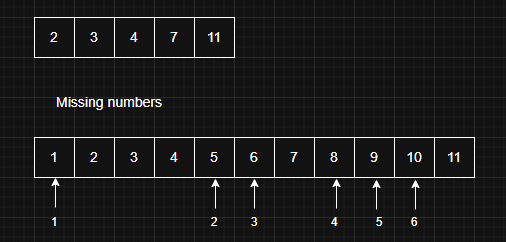

Here 9 is the 5th missing number

Consider each element of arr  
2 < k=5 -> k+1 -> k=6  
3 < k=6 -> k+1 -> k=7  
4 < k=7 -> k+1 -> k=8  
7 < k=8 -> k+1 -> k=9
11 > k=9 -> ans = 9 stop


In [ ]:
# Brute force loop through the array
arr = [2,3,4,7,11]
k = 5
for i in range(len(arr)):
    if arr[i] <= k:
        k+=1
    else:
        break
print(k)
# Time complexity: O(N)
# Space complexity: O(1)

9


#### Using binary search
Consider the array = [2,3,4,7,11] and k = 5, the answer is 9 -> this will be between 7 and 11   

The answer will be between 2 and 4 for k = 5, we have to reduce the range from 2 - 11 to 7 - 11

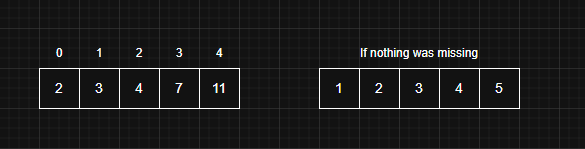  

Here in place of 7, 4 should be there, 7-4 = 3 numbers are missing  
In place of 11, 5 should be there. 11-5 = 6 numbers are missing  
Here we are looking for 5th number so 4 < 5 < 6, the ans lies between 7 and 11.  

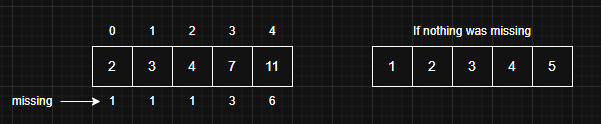

Apply binary search on [1,1,1,3,6]  
If mid < k eliminate left  
If mid > k eliminate right 

After search high -> 7 (3 missing)


In [10]:
# Using binary search
arr = [2,3,4,7,11]
k = 5
low = 0
high = len(arr) - 1
while low<=high:
    mid = int((low+high)/2)
    missing = arr[mid] - (mid + 1) # missing = arr[ind] - (ind + 1)
    # eliminate left
    if missing < k:
        low = mid+1
    # eliminate right
    else:
        high = mid-1

ans = high + k + 1
print(ans)
# Time complexity: O(log n)
# Space complexity: O(1)

9
